# Resolução lista 8: Métodos Iterativos para Sistema Lineares e Redução de Dados 
Exercícios 5 e 6

In [578]:
import Pkg; 

Pkg.add("Images")

using LinearAlgebra
using Images
using Printf

  Resolving package versions...
No Changes to `C:\Users\carla\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\carla\.julia\environments\v1.5\Manifest.toml`


## Exercício 5

Abaixo determinaremos uma matriz M de posto 1 (tal que $M = bc^T$) que melhor representa a matriz A e o erro para:

### (a) $
\begin{bmatrix}
0 & 1 & 3 \\
3 & 1 & 0 \\
\end{bmatrix}
$

In [579]:
A = [0 1 3;
     3 1 0]

2×3 Array{Int64,2}:
 0  1  3
 3  1  0

In [580]:
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m,n=size(A)
    A=1.0*A
    c=zeros(n,1)
    c=A'*(b/(b'*b))
    return c
end

function melhorMatrizM(A)
    n,m = size(A)
    erroFinal = 0.0

    b1 = randn(n,1)
    c1 = randn(m,1)
    
    b2 = randn(m,1)
    c2 = randn(n,1)
    
    erro1 = norm(A-b1*c1')
    print("Erro inicial: ", erro1, "\n")
    
    for i = 1:50
        c1 = melhores_coords(A,b1) # Acha melhores coordenadas para A
        b2 = c1 # Trocamos de mundo e colocamos base no lugar de coordenada e vice-versa (aqui queremos minimizar o erro ||A'-b'c||)
        c2 = melhores_coords(A',b2) # Acha melhpres coordenadas para A'
        b1 = c2 # Trocamos de mundo novamente para retornamos ao mundo ininicial (onde queremos minimizar o erro ||A-bc'||)
        
        erroFinal = norm(A'-b2*c2')
        
        # Erros de b e c no mundo 2, onde trocamos base por coordenadas e vice-versa
        #      A              |           A'
        # norm(A-b*c') <- é igual a -> norm(A'-b'*c)
        #erro2 = norm(A'-b2*c2')
        #print(erro2, "\n")
    end
    print("Erro final: ", erroFinal, "\n")
    
    return b1,c1
end

melhorMatrizM (generic function with 1 method)

In [581]:
b,c = melhorMatrizM(A)

Erro inicial: 5.614804216402835
Erro final: 3.000000000015687


([-0.7758958660565357; -0.7759054953592216], [-1.933251785315548; -1.2888247488591023; -1.9332224612617592])

In [582]:
# Vetor b dividido pela primeira coordenada
b/b[1]

2×1 Array{Float64,2}:
 1.0
 1.000012410560627

In [583]:
# Vetor c' multiplicado pela primeira coordenada
c'*b[1]

1×3 Array{Float64,2}:
 1.5  0.999994  1.49998

In [584]:
# Para reconstruir a matriz A, aproximadamente, temos a matriz M = bc'
M = b*c'

2×3 Array{Float64,2}:
 1.5      0.999994  1.49998
 1.50002  1.00001   1.5

In [585]:
print("Erro de M: ", norm(A-b*c'))

Erro de M: 3.000000000015687

Abaixo determinaremos uma matriz M de posto 1 (tal que $M = bc^T$) que melhor representa a matriz A e o erro para:

### (b) $
\begin{bmatrix}
0 & 1 & 3 & 2\\
2 & 3 & 1 & 0\\
\end{bmatrix}
$


In [586]:
A = [0 1 3 2;
     2 3 1 0]

2×4 Array{Int64,2}:
 0  1  3  2
 2  3  1  0

In [587]:
b,c = melhorMatrizM(A)

Erro inicial: 5.0291725915124825
Erro final: 2.8284271247461903

([0.35722421139988547; 0.3572242113998854], [2.7993623278814543; 5.598724655762909; 5.59872465576291; 2.799362327881455])

In [588]:
# Vetor b dividido pela primeira coordenada
b/b[1]

2×1 Array{Float64,2}:
 1.0
 0.9999999999999999

In [589]:
# Vetor c' multiplicado pela primeira coordenada
c'*b[1]

1×4 Array{Float64,2}:
 1.0  2.0  2.0  1.0

In [590]:
# Para reconstruir a matriz A, aproximadamente, temos a matriz M = bc'
M = b*c'

2×4 Array{Float64,2}:
 1.0  2.0  2.0  1.0
 1.0  2.0  2.0  1.0

In [591]:
print("Erro de M: ", norm(A-b*c'))

Erro de M: 2.8284271247461903

### (c) 
A representação gráfica das soluções acima nos desenhos citados na lista é uma reta que minimiza a diferença entre todos esses pontos e a reta (projeção ortogonal). Em outras palavras, a solução gráfica é uma única reta que contém N vetores (posto 1) que mais se aproximam dos N pontos passados.

## Exercício 6

Consideraremos a bandeira da grécia como uma imagem preta e branca modelada na matriz A abaixo:

Considerando 0 como a cor preto e 1 a cor branco, temos:

$
\begin{bmatrix}
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$

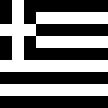

3

In [592]:
greece = [0   1   0   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          1   1   1   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          0   1   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ]

display(Gray.(greece))
rank(greece)

### (a)
O posto da bandeira da Grécia, tal que $A = BC^T$ é igual a 3, ou seja, com 3 colunas da bandeira, conseguimos reconstruir completamente a bandeira original (sem perdas).

No caso da bandeira da Grécia, a matriz B representa pedaços verticais do desenho da bandeira que se repetem de intervalos verticais em intervalos verticais da bandeira. Em outras palavras, com 3 faixas verticais da bandeira, conseguimos fazer algumas repetições até que a bandeira esteja completa.

### (b)
Dois países tais quais sua bandeira tem posto = 1:
- Alemanha
- Austria

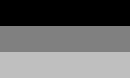

1

In [593]:
germany = [0    0    0    0    0   ; # preto
           0.5  0.5  0.5  0.5  0.5 ; # vermelho
           0.75 0.75 0.75 0.75 0.75] # amarelo

display(Gray.(germany))
rank(germany)

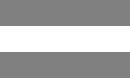

1

In [594]:
austria = [0.5 0.5 0.5 0.5 0.5; # vermelho
           1   1   1   1   1  ; # branco
           0.5 0.5 0.5 0.5 0.5] # vermelho

display(Gray.(austria))
rank(austria)

### (c)
Dois países tais quais sua bandeira tem posto = 2:
- Nigéria
- Finlândia

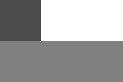

2

In [595]:
chile = [0.3  1    1   ; # azul / branco
         0.5  0.5  0.5 ] # vermelho  

display(Gray.(chile))
rank(chile)

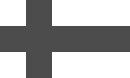

2

In [596]:
finland = [1    0.3  1    1    1   ; # branco / azul  / branco
           0.3  0.3  0.3  0.3  0.3 ; # azul
           1    0.3  1    1    1   ] # branco / azul  / branco

display(Gray.(finland))
rank(finland)

### (d)
Dois países tais quais sua bandeira tem posto = 3:
- Suíça
- Grécia

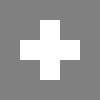

3

In [597]:
switz = [0.5  0.5  0.5  0.5  0.5 ; # vermelho
         0.5  0.5  1    0.5  0.5 ; # vermelho / branco / vermelho
         0.5  1    1    1    0.5 ; # vermelho / branco / vermelho
         0.5  0.5  1    0.5  0.5 ; # vermelho / branco / vermelho
         0.5  0.5  0.5  0.5  0.5 ] # vermelho

display(Gray.(switz))
rank(switz)

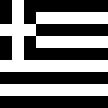

In [598]:
greece = [0   1   0   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          1   1   1   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          0   1   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ]

Gray.(greece)